# Desafio Análise de Dados

1. Nem todos os envolvidos estão convictos com a ideia de uma frente de BIs no BanVic. Como podemos convencer Camila Diniz, diretora comercial,  que as nossas soluções serão úteis para a empresa? Com base na análise exploratória realizada nos dados apresentados, quais perguntas de negócio podemos responder para mostrar o valor que dados possuem para a empresa? Pergunta de nível teórico. O seu projeto final não necessariamente precisa trazer os mesmos ou todos os indicadores citados nessa entrega.


2. Quais serão os indicadores ou visualizações utilizadas para responder às perguntas de negócio citadas anteriormente? Pergunta de nível teórico. O seu projeto final não necessariamente precisa trazer os mesmos ou todos os indicadores citados nessa entrega.


3. Apresentar pelo menos duas análises de negócio para cada uma das categorias. Pergunta de nível teórico. O seu projeto final não necessariamente precisa ter todas análises citadas nessa entrega: 


        Uma análise descritiva;
        Uma análise diagnóstica;
        Uma análise prescritiva;
        Uma análise preditiva.


4. Um relatório em PDF com suas análises, justificativas e raciocínio contendo os seguintes pontos:

        As respostas do item 1, 2 e 3.
        Um tópico descrevendo brevemente quais os processos de transformação e tratamento de dados foram aplicados por você.
        Um dashboard dos principais KPIs de negócio do BanVic permitindo um detalhamento por data, por agência e por clientes.
        Apresentar as análises que foram necessárias para o entendimento do negócio e que podem ser úteis no suporte para a tomada de decisão.
        E finalmente, com base nas suas análises, uma conclusão com recomendações/sugestões de negócio e encaminhamentos para a CEO do BanVic.
        Apresentar e justificar as ferramentas adotadas para a elaboração das análises.


## 1° importar as bibliotecas 

In [181]:
#importar bibliotecas
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import ScalarFormatter

## 2° Importar e criar os dataframes

In [182]:
#criar as tabelas para trabalhar

agencias = pd.read_csv("data/agencias.csv")
clientes = pd.read_csv('data/clientes.csv')
colaborador_agencia = pd.read_csv('data/colaborador_agencia.csv')
colaboradores = pd.read_csv('data/colaboradores.csv')
contas = pd.read_csv('data/contas.csv')
propostas_credito = pd.read_csv('data/propostas_credito.csv')
transacoes = pd.read_csv('data/transacoes.csv')

## 3° Analisar cada um dos dataframes e transformar os dados conforme necessário

### 3.1 DataFrame 'agencias'

In [183]:
agencias.info()

print()
print(agencias.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cod_agencia    10 non-null     int64 
 1   nome           10 non-null     object
 2   endereco       10 non-null     object
 3   cidade         10 non-null     object
 4   uf             10 non-null     object
 5   data_abertura  10 non-null     object
 6   tipo_agencia   10 non-null     object
dtypes: int64(1), object(6)
memory usage: 692.0+ bytes

   cod_agencia              nome  \
0            7   Agência Digital   
1            1    Agência Matriz   
2            2   Agência Tatuapé   
3            3  Agência Campinas   
4            4    Agência Osasco   

                                            endereco     cidade  uf  \
0  Av. Paulista, 1436 - Cerqueira César, São Paul...  São Paulo  SP   
1  Av. Paulista, 1436 - Cerqueira César, São Paul...  São Paulo  SP   
2  Praça Sílvio Romero, 15

    Os dados dos cabeçalhos se encontram de padronizados em letra minuscula e snake case. 
    O arquivo possui dez entradas e nenhuma das células apresenta valores nulos.
    É necessário alterar o tipo de dados para datetime na coluna data_abertura.

In [184]:
#transformando os dados para datetime
agencias['data_abertura'] = pd.to_datetime(agencias['data_abertura'])

#conferindo
agencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cod_agencia    10 non-null     int64         
 1   nome           10 non-null     object        
 2   endereco       10 non-null     object        
 3   cidade         10 non-null     object        
 4   uf             10 non-null     object        
 5   data_abertura  10 non-null     datetime64[ns]
 6   tipo_agencia   10 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 692.0+ bytes


### 3.2 DataFrame 'clientes'

In [185]:
clientes.info()
print()
print(clientes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cod_cliente      998 non-null    int64 
 1   primeiro_nome    998 non-null    object
 2   ultimo_nome      998 non-null    object
 3   email            998 non-null    object
 4   tipo_cliente     998 non-null    object
 5   data_inclusao    998 non-null    object
 6   cpfcnpj          998 non-null    object
 7   data_nascimento  998 non-null    object
 8   endereco         998 non-null    object
 9   cep              998 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.1+ KB

   cod_cliente primeiro_nome ultimo_nome                         email  \
0           28       Sabrina        Dias  moreiraemanuelly@example.org   
1          674   Luiz Felipe        Dias     pedroferreira@example.org   
2          693         Renan        Dias            ogomes@example.net   
3      

    É necessário transformar as colunas de data (data_inclusao e data_nascimento) para corresponderem ao formato datetime;
    É necessário padronizar o formato CEP para ter o traço.
    Não há células com valores nulos dentro do DataFrame 'clientes'

In [186]:
#arrumar os dados correspondentes para datetime

clientes['data_inclusao'] = pd.to_datetime(clientes['data_inclusao'])
clientes['data_nascimento'] = pd.to_datetime(clientes['data_nascimento'])


In [187]:
#Criar uma função para arrumar os dados de CEP

def formatar_cep(cep):
    if '-' not in cep:
        return f"{cep[:5]}-{cep[5:]}"
    else:
        return cep

# Aplicar a função à coluna desejada
clientes['cep'] = clientes['cep'].apply(formatar_cep)

In [188]:
#conferir se realizou a troca
print(clientes['cep'].sample(10))

84     32770-840
828    80604-493
411    94247-539
589    56080-861
805    71513-521
64     70396-535
923    27706-384
260    86348-520
556    17882-080
698    29259-296
Name: cep, dtype: object


### 3.3 DataFrame 'colaborador_agencia'

In [189]:
#conferir os dados
colaborador_agencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   cod_colaborador  100 non-null    int64
 1   cod_agencia      100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


    O DataFrame colaborador_agencia não possui valores nulos nas células, nem valores que precisam ter seus tipos alterados.

### 3.4 DataFrame 'colaboradores'

In [190]:
#Conferindo os dados do DataFrame 'colaboradores'

colaboradores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cod_colaborador  100 non-null    int64 
 1   primeiro_nome    100 non-null    object
 2   ultimo_nome      100 non-null    object
 3   email            100 non-null    object
 4   cpf              100 non-null    object
 5   data_nascimento  100 non-null    object
 6   endereco         100 non-null    object
 7   cep              100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [191]:
#amostrar o formato de data de nascimento dos colaboradores 
print(colaboradores['data_nascimento'].sample(5))

#converter o tipo de dados para datetime

colaboradores['data_nascimento'] = pd.to_datetime(colaboradores['data_nascimento'])

49    1980-01-16
96    1992-01-12
23    1974-06-03
67    1969-04-01
81    1978-07-13
Name: data_nascimento, dtype: object


In [192]:
#alterar o nome das colunas para não confundir na hora do merge

colaboradores.rename(columns={'endereco':'endereco_colaborador',
                              'cpf':'cpf_colaborador',
                              'cep':'cep_colaborador',
                              'email':'email_colaborador',
                              'primeiro_nome':'primeiro_nome_colab',
                              'ultimo_nome':'ultimo_nome_colab',
                              'data_nascimento':'data_nascimento_colab'},inplace=True,)

In [193]:
colaboradores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cod_colaborador        100 non-null    int64         
 1   primeiro_nome_colab    100 non-null    object        
 2   ultimo_nome_colab      100 non-null    object        
 3   email_colaborador      100 non-null    object        
 4   cpf_colaborador        100 non-null    object        
 5   data_nascimento_colab  100 non-null    datetime64[ns]
 6   endereco_colaborador   100 non-null    object        
 7   cep_colaborador        100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 6.4+ KB


    O DataFrame 'colaboradores' não possui valores nulos e foi necessário alterar o tipo de dados do campo data_nascimento para datetime.

### 3.5 DataFrame 'contas'

In [194]:
#entender os dados do DataFrame 'contas'

contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_conta               999 non-null    int64  
 1   cod_cliente             999 non-null    int64  
 2   cod_agencia             999 non-null    int64  
 3   cod_colaborador         999 non-null    int64  
 4   tipo_conta              999 non-null    object 
 5   data_abertura           999 non-null    object 
 6   saldo_total             999 non-null    float64
 7   saldo_disponivel        999 non-null    float64
 8   data_ultimo_lancamento  999 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


In [195]:
print(contas[['data_abertura','data_ultimo_lancamento']].sample(5))

               data_abertura          data_ultimo_lancamento
303  2020-08-28 11:27:00 UTC  2022-12-30 00:00:00.084096 UTC
937  2021-08-23 12:15:00 UTC  2022-12-30 00:00:00.550629 UTC
595  2022-07-12 13:16:00 UTC  2022-12-30 00:00:00.047577 UTC
856  2019-04-24 13:55:00 UTC  2022-12-30 00:00:00.544625 UTC
238  2014-09-20 11:49:00 UTC         2019-12-14 17:57:10 UTC


In [196]:
#transformar as colunas de data para o formato datetime
contas['data_abertura'] = pd.to_datetime(contas['data_abertura'])

In [197]:
contas['data_ultimo_lancamento'] = pd.to_datetime(contas['data_ultimo_lancamento'], format='mixed')

### 3.6 DataFrame 'propostas_credito'

In [198]:
#entendendo os dados do DataFrame propostas_credito

propostas_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_proposta           2000 non-null   int64  
 1   cod_cliente            2000 non-null   int64  
 2   cod_colaborador        2000 non-null   int64  
 3   data_entrada_proposta  2000 non-null   object 
 4   taxa_juros_mensal      2000 non-null   float64
 5   valor_proposta         2000 non-null   float64
 6   valor_financiamento    2000 non-null   float64
 7   valor_entrada          2000 non-null   float64
 8   valor_prestacao        2000 non-null   float64
 9   quantidade_parcelas    2000 non-null   int64  
 10  carencia               2000 non-null   int64  
 11  status_proposta        2000 non-null   object 
dtypes: float64(5), int64(5), object(2)
memory usage: 187.6+ KB


In [199]:
#transformar os dados para o formato datetime da coluna 'data_entrada_proposta'
propostas_credito['data_entrada_proposta'] = pd.to_datetime(propostas_credito['data_entrada_proposta'])

    O dataframe 'propostas_credito' não possui valores nulos e preciso que a coluna 'data_entrada_proposta' tivesse seu valor alterado para o formato datetime.

### 3.7 DataFrame 'transacoes'


In [200]:
#entender os dados do DataFrame 'transacoes'
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cod_transacao    71999 non-null  int64  
 1   num_conta        71999 non-null  int64  
 2   data_transacao   71999 non-null  object 
 3   nome_transacao   71999 non-null  object 
 4   valor_transacao  71999 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ MB


In [201]:
#transformar a coluna 'data_transacao' para o formato datetime

transacoes['data_transacao'] = pd.to_datetime(transacoes['data_transacao'], format='mixed')

## 4° Usando esses dados

 - Perguntas para responder
      - transações financeiras
      - comportamento dos clientes em diversos canais
      - como o PIX afetou as transações
      - identificar padrões de inatividade
      - avaliar a popularidade da agência digital em comparação com a agência física
      - o BanVic pode investir mais em marketing  e melhorar a segmentação dos clientes nas cidades que o banco já está estabelecido
          - Quanto capital os novos bancos trouxeram?

- Nem todos os envolvidos estão convictos com a ideia de uma frente de BIs no BanVic. Como podemos convencer Camila Diniz, diretora comercial,  que as nossas soluções serão úteis para a empresa? Com base na análise exploratória realizada nos dados apresentados, quais perguntas de negócio podemos responder para mostrar o valor que dados possuem para a empresa?

- Quais serão os indicadores ou visualizações utilizadas para responder às perguntas de negócio citadas anteriormente? 

- Apresentar pelo menos duas análises de negócio para cada uma das categorias.
    - Uma análise descritiva;
    - Uma análise diagnóstica;
    - Uma análise prescritiva;
    - Uma análise preditiva

### 4.1 Perfil do cliente

In [202]:
#tipo de contas dos usuários

tipo_de_conta = contas['tipo_conta'].value_counts()

print(tipo_de_conta)

tipo_conta
PF    999
Name: count, dtype: int64


Conclusão
- Todas as contas do banco são de pessoa física.

In [203]:
print(agencias[['cod_agencia','nome']].sort_values(by='cod_agencia'))

   cod_agencia                    nome
1            1          Agência Matriz
2            2         Agência Tatuapé
3            3        Agência Campinas
4            4          Agência Osasco
5            5    Agência Porto Alegre
6            6  Agência Rio de Janeiro
0            7         Agência Digital
7            8         Agência Jardins
8            9   Agência Florianópolis
9           10          Agência Recife


Text(0.5, 1.0, 'Saldo total por agência')

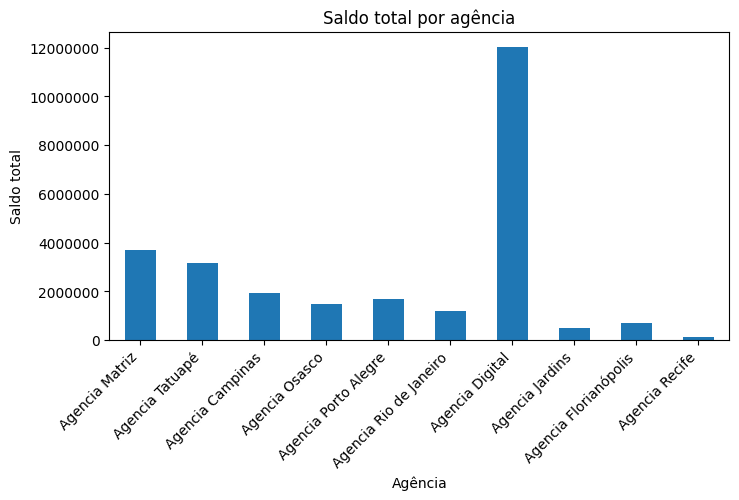

In [204]:
#Qual o saldo total por agência?
saldo_total_por_agencia = contas.groupby('cod_agencia')['saldo_total'].sum()

nome_agencias = ['Agencia Matriz', 'Agencia Tatuapé','Agencia Campinas','Agencia Osasco','Agencia Porto Alegre','Agencia Rio de Janeiro','Agencia Digital','Agencia Jardins','Agencia Florianópolis','Agencia Recife']

plt.figure(figsize=[8,4])
saldo_total_por_agencia.plot(kind='bar')
plt.ylabel("Saldo total")
plt.xlabel('Agência')
plt.xticks(range(len(nome_agencias)), nome_agencias, rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Saldo total por agência')


Text(0.5, 1.0, 'Clientes por agência')

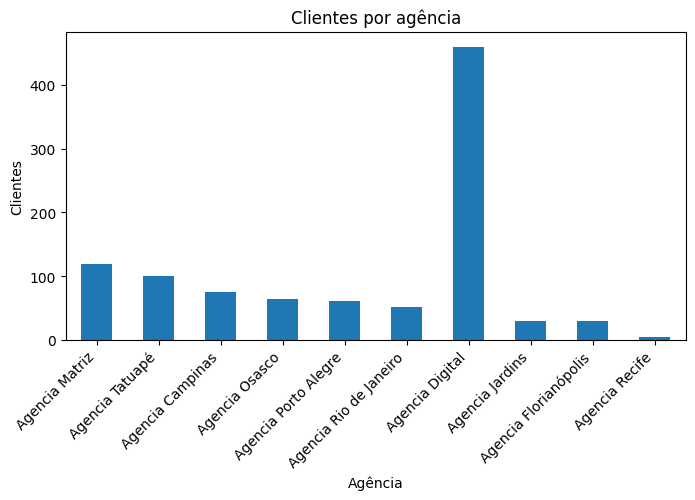

In [205]:
#Quantos clientes por agência?
clientes_por_agencia = contas.groupby('cod_agencia')['cod_cliente'].count()
plt.figure(figsize=[8,4])
clientes_por_agencia.plot(kind='bar')
plt.ylabel("Clientes")
plt.xlabel('Agência')
plt.xticks(range(len(nome_agencias)), nome_agencias, rotation=45, ha='right')
plt.title('Clientes por agência')


Text(0.5, 1.0, 'Saldo médio por agência')

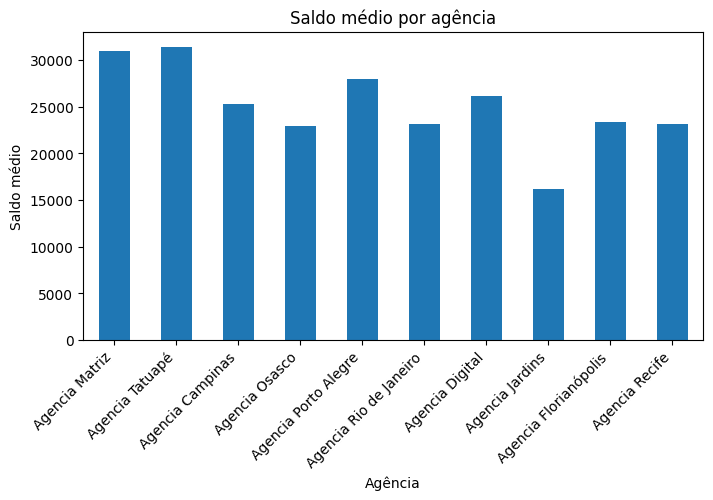

In [206]:
#Qual o aldo médio por agência?
saldo_medio_por_agencia = contas.groupby('cod_agencia')['saldo_total'].mean()
plt.figure(figsize=[8,4])
saldo_medio_por_agencia.plot(kind='bar')
plt.ylabel("Saldo médio")
plt.xlabel('Agência')
plt.xticks(range(len(nome_agencias)), nome_agencias, rotation=45, ha='right')
plt.title('Saldo médio por agência')

Conclusão

- É possível averiguar que a agencia digital é a que possui o maior número de clientes, assim como o maior saldo. Entretando, ao avaliar o saldo médio por agência, temos as agências Matriz e Tatuapé como com maior saldo médio.

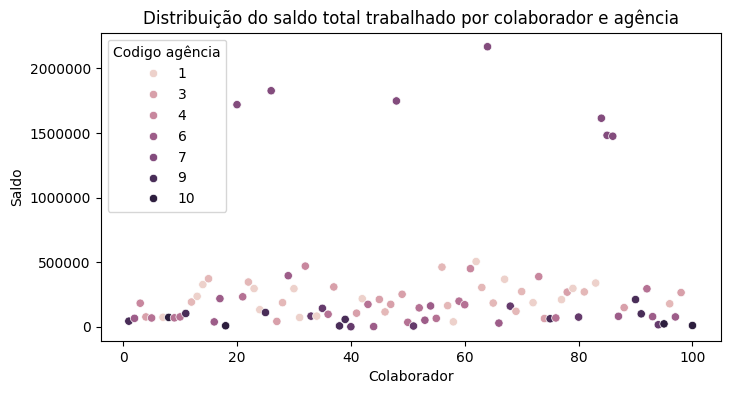

In [207]:
#Qual o saldo movimentado por colaborador?

saldo_por_colaborador_agencia = contas.groupby(['cod_colaborador', 'cod_agencia'])['saldo_total'].sum().reset_index()

plt.figure(figsize=[8,4])
sns.scatterplot(x='cod_colaborador', y='saldo_total', hue='cod_agencia', data=saldo_por_colaborador_agencia)
plt.title('Distribuição do saldo total trabalhado por colaborador e agência')
plt.xlabel('Colaborador')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Saldo")
plt.legend(title='Codigo agência')


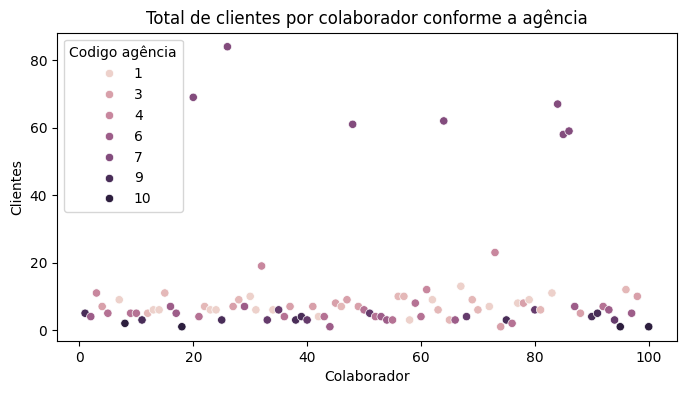

In [208]:
#quantos clientes cada colaborador tem?

clientes_por_colaborador = contas.groupby(['cod_colaborador','cod_agencia'])['cod_cliente'].count().reset_index()

plt.figure(figsize=[8,4])
sns.scatterplot(x='cod_colaborador', y='cod_cliente', hue='cod_agencia', data=clientes_por_colaborador)
plt.title("Total de clientes por colaborador conforme a agência")
plt.xlabel('Colaborador')
plt.ylabel('Clientes')
plt.legend(title='Codigo agência')

Conclusão

- Temos 7 colaboradores dentre todas as agências que trabalham com saldos acima de um milhão de reais.
    - Sendo que a maioria dos colaboradores trabalha com saldos até quinhentos mil reais
- Também temos 7 colaboradores com mais de 50 clientes.
    - Onde a maioria dos colaboradores tem até 20 clientes.


### 4.2 Transações

In [209]:
#criar coluna de data, ano, mês, dia e dia da semana no DataFrame 'trasacoes'
transacoes['data'] = transacoes['data_transacao'].dt.date
transacoes['ano_transacao'] = transacoes['data_transacao'].dt.year
transacoes['month'] = transacoes['data_transacao'].dt.month
transacoes['day'] = transacoes['data_transacao'].dt.day
transacoes['day_of_week'] = transacoes['data_transacao'].dt.day_of_week

#### 4.2.1 Quais tipos de transações foram realizadas por agência?

In [210]:
#primeiro, unir os dataframes 'transacoes' e 'contas' para tirar devinir as transações por agência

transacoes_e_contas = pd.merge(contas, transacoes[['num_conta','nome_transacao','ano_transacao']], on='num_conta')

transacoes_e_contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   num_conta               71999 non-null  int64              
 1   cod_cliente             71999 non-null  int64              
 2   cod_agencia             71999 non-null  int64              
 3   cod_colaborador         71999 non-null  int64              
 4   tipo_conta              71999 non-null  object             
 5   data_abertura           71999 non-null  datetime64[ns, UTC]
 6   saldo_total             71999 non-null  float64            
 7   saldo_disponivel        71999 non-null  float64            
 8   data_ultimo_lancamento  71999 non-null  datetime64[ns, UTC]
 9   nome_transacao          71999 non-null  object             
 10  ano_transacao           71999 non-null  int32              
dtypes: datetime64[ns, UTC](2), float64(2), in

Text(0, 0.5, '')

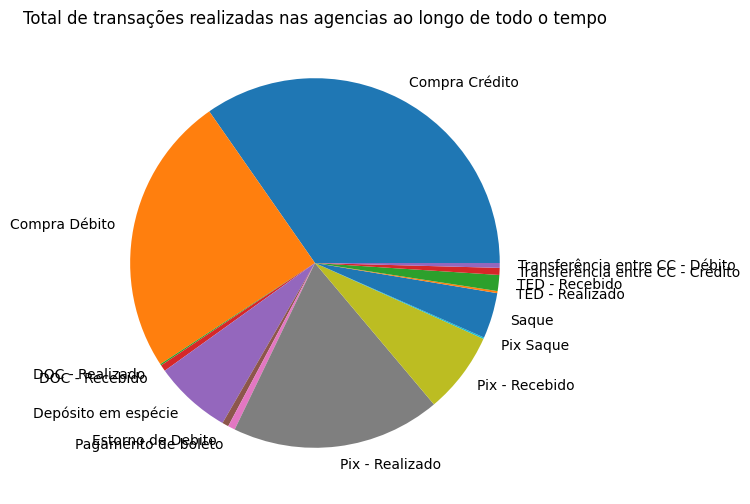

In [211]:
#Qual o total de transações financeiras por agencia?
transacoes_por_agencia = transacoes_e_contas.groupby('nome_transacao')['cod_agencia'].count()

#descobrindo a porcentagem de representação de cada uma das transações
transacoes_por_agencia_total = transacoes_por_agencia.sum()

transacoes_por_agencia_porcent = (transacoes_por_agencia/transacoes_por_agencia_total)*100

plt.figure(figsize=[10,6])
transacoes_por_agencia_porcent.plot(kind='pie')
plt.title('Total de transações realizadas nas agencias ao longo de todo o tempo')
plt.ylabel('')

In [212]:
print(transacoes_por_agencia_porcent.sort_values(ascending=False))

nome_transacao
Compra Crédito                      34.690760
Compra Débito                       24.530896
Pix - Realizado                     18.283587
Pix - Recebido                       7.130655
Depósito em espécie                  6.758427
Saque                                3.998667
TED - Recebido                       1.395853
Pagamento de boleto                  0.627786
Transferência entre CC - Crédito     0.612509
Estorno de Debito                    0.559730
DOC - Recebido                       0.558341
Transferência entre CC - Débito      0.420839
TED - Realizado                      0.180558
DOC - Realizado                      0.126391
Pix Saque                            0.125002
Name: cod_agencia, dtype: float64


Conclusão
- Temos que dentro de todas as agências, a maior quantidade de transaçoes que ocorre é a compra no crédito (34,69%), seguido do débito (24,53%) e em terceiro a realização de Pix (18,28%).
- Demais transações envolvedo transfêrencias de valores (que não incluem o Pix), estão em sua maioria abaixo 1,4% de participação nas transações.

#### 4.2.1.1 Quais as transações realizadas por agência

In [213]:
#Filtrar os dados para 2010 e 2022

transacoes_e_contas_2010 = transacoes_e_contas[transacoes_e_contas['ano_transacao']==2010]
transacoes_e_contas_2019 = transacoes_e_contas[transacoes_e_contas['ano_transacao']==2019]
transacoes_e_contas_2022 = transacoes_e_contas[transacoes_e_contas['ano_transacao']==2022]

Text(0, 0.5, '')

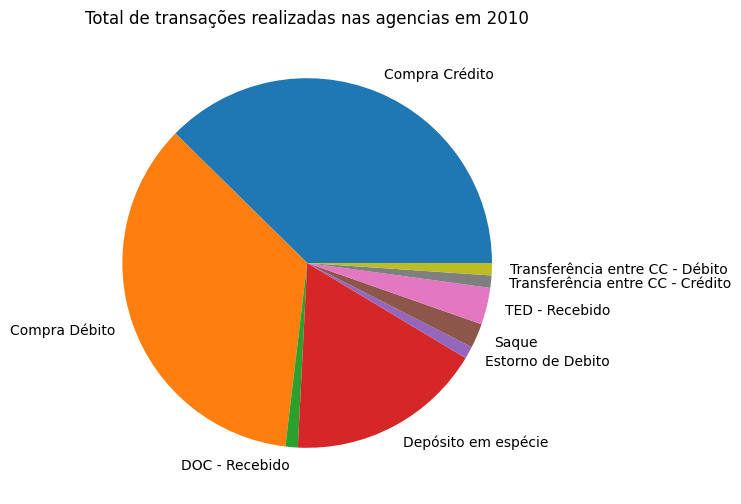

In [214]:
#Qual o total de transações financeiras por agencia em 2010?
transacoes_por_agencia_2010 = transacoes_e_contas_2010.groupby('nome_transacao')['cod_agencia'].count()

#descobrindo a porcentagem de representação de cada uma das transações
transacoes_por_agencia_2010_total = transacoes_por_agencia_2010.sum()

transacoes_por_agencia_porcent_2010 = (transacoes_por_agencia_2010/transacoes_por_agencia_2010_total)*100

plt.figure(figsize=[10,6])
transacoes_por_agencia_porcent_2010.plot(kind='pie')
plt.title('Total de transações realizadas nas agencias em 2010')
plt.ylabel('')

Text(0, 0.5, '')

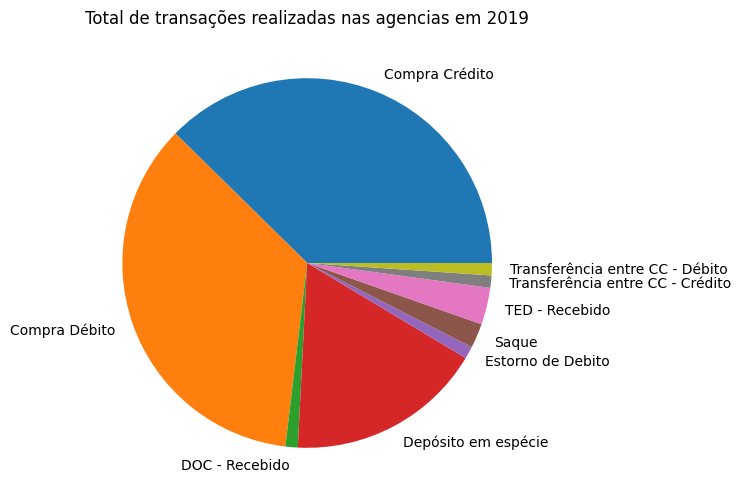

In [215]:
#Qual o total de transações financeiras por agencia em 2019?
transacoes_por_agencia_2019 = transacoes_e_contas_2019.groupby('nome_transacao')['cod_agencia'].count()

#descobrindo a porcentagem de representação de cada uma das transações
transacoes_por_agencia_2019_total = transacoes_por_agencia_2019.sum()

transacoes_por_agencia_porcent_2019 = (transacoes_por_agencia_2019/transacoes_por_agencia_2019_total)*100

plt.figure(figsize=[10,6])
transacoes_por_agencia_porcent_2010.plot(kind='pie')
plt.title('Total de transações realizadas nas agencias em 2019')
plt.ylabel('')

Text(0, 0.5, '')

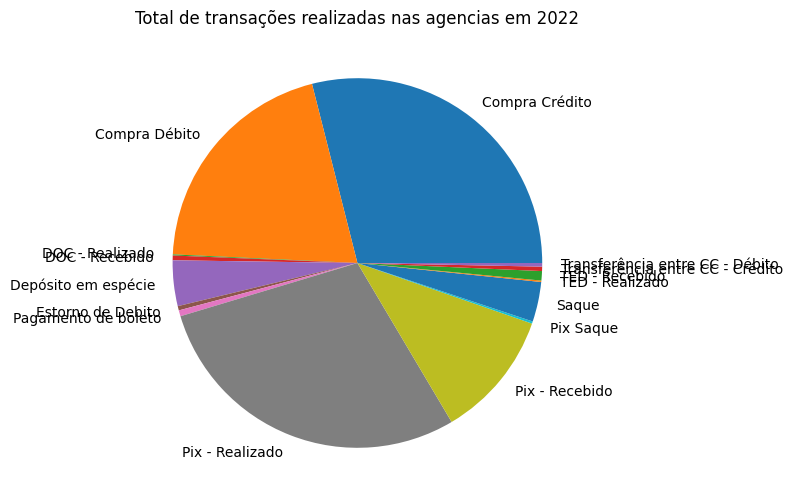

In [216]:
#Qual o total de transações financeiras por agencia em 2022?
transacoes_por_agencia_2022 = transacoes_e_contas_2022.groupby('nome_transacao')['cod_agencia'].count()

#descobrindo a porcentagem de representação de cada uma das transações
transacoes_por_agencia_2022_total = transacoes_por_agencia_2022.sum()

transacoes_por_agencia_porcent_2022 = (transacoes_por_agencia_2022/transacoes_por_agencia_2022_total)*100

plt.figure(figsize=[10,6])
transacoes_por_agencia_porcent_2022.plot(kind='pie')
plt.title('Total de transações realizadas nas agencias em 2022')
plt.ylabel('')

Conclusão
- Com base nos dois gráficos comparando as transações realizadas em 2010, 2019 (ano anterior a implantação do pix) e 2022, observa-se que compras no crédito ou débito ainda são muito realizadas e que o Pix acabou substituindo os depósitos realizados em espécie.

### 4.2.2 Financiamentos

In [217]:
#Criar a coluna de ano para utilizar posteriormente

propostas_credito['ano'] = propostas_credito['data_entrada_proposta'].dt.year

Text(0, 0.5, 'Contagem de financiamentos')

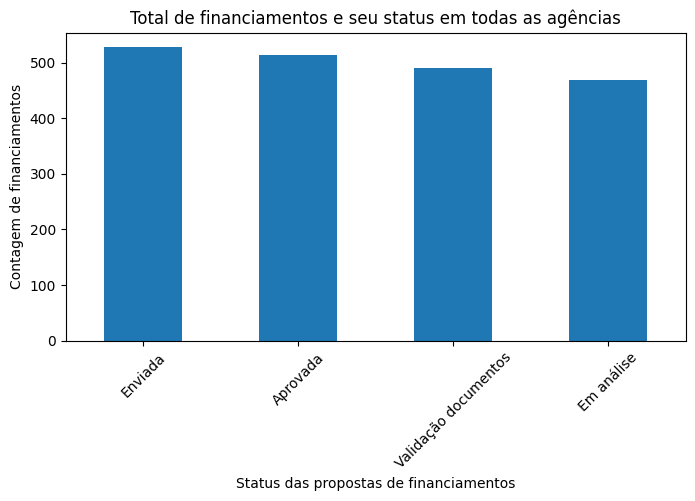

In [218]:
#Em todas as agencias, quantos financiamentos temos e qual o status destes financiamentos?
propostas_de_financiamento = propostas_credito['status_proposta'].value_counts()

plt.figure(figsize=[8,4])
propostas_de_financiamento.plot(kind='bar')
plt.title('Total de financiamentos e seu status em todas as agências')
plt.xlabel('Status das propostas de financiamentos')
plt.xticks(rotation=45)
plt.ylabel('Contagem de financiamentos')


In [219]:
soma_propostas_financiamento = propostas_de_financiamento.sum()

print(f'Desde sua fundação, o banco teve {soma_propostas_financiamento} propostas de financiamento.')

Desde sua fundação, o banco teve 2000 propostas de financiamento.


Text(0, 0.5, 'Capital total (R$)')

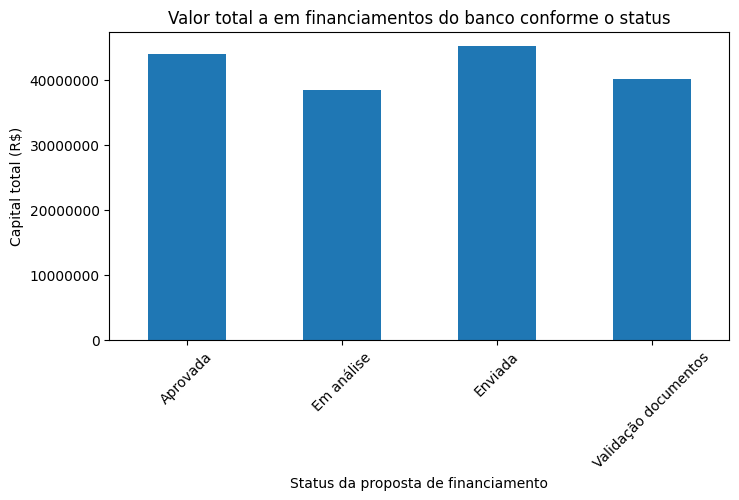

In [220]:
#Valores totais de cada uma das propostas de financiamento

total_valor_financiamento = propostas_credito.groupby('status_proposta')['valor_proposta'].sum()

plt.figure(figsize=[8,4])
total_valor_financiamento.plot(kind='bar')
plt.title('Valor total a em financiamentos do banco conforme o status')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.xlabel('Status da proposta de financiamento')
plt.ylabel("Capital total (R$)")


In [221]:
soma_tota_financiamentos = (total_valor_financiamento.sum()/1000000).round(2)
print(f'Em financiamentos, o banco teve um giro total de R${soma_tota_financiamentos} milhões desde sua fundação.')

Em financiamentos, o banco teve um giro total de R$167.78 milhões desde sua fundação.


Conclusão
- O banco tem 2000 propostas de financiamento distribuidas quase igualmente entre os status desde sua fundação.
- O banco já movimentou entre todos os financiamentos cerca de R$167,78 milhões desde sua fundação.


Text(0, 0.5, 'Valor (R$)')

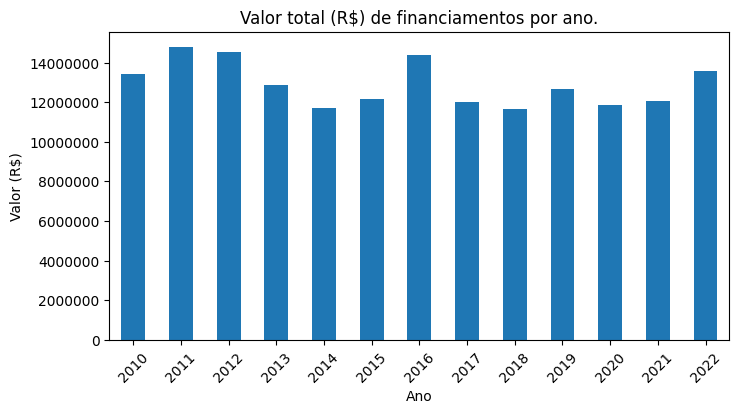

In [222]:
#valor total de financiamento por ano

valor_de_financiamento_ano = propostas_credito.groupby('ano')['valor_proposta'].sum()

plt.figure(figsize=[8,4])
valor_de_financiamento_ano.plot(kind='bar')
plt.title("Valor total (R$) de financiamentos por ano.")
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Valor (R$)')


Conclusão
- Ao longo de todos os anos o Banco trabalhou com financiamentos no valor total acima de R$ 100 milhões.

#### 4.2.2.1 Distribuição dos valores médios dos financiamentos por cliente

Text(0.5, 0, 'Valor (R$)')

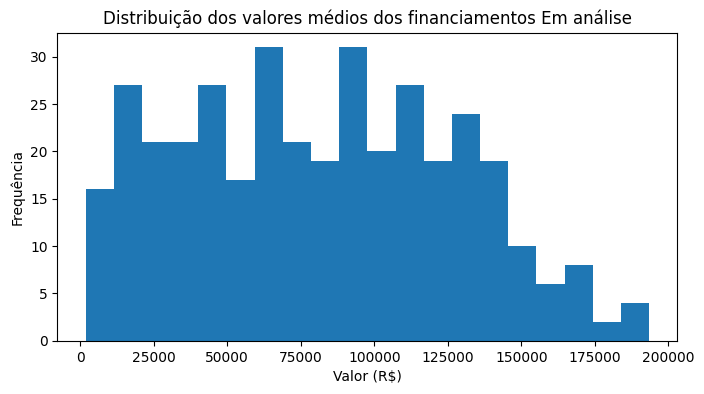

In [223]:
#Qual a média de valor por cliente conforme os financiamentos?

#Financiamentos em análise

financiamento_em_analis = propostas_credito[propostas_credito['status_proposta']=='Em análise']

media_financ_em_analis_por_cliente = financiamento_em_analis.groupby('cod_cliente')['valor_proposta'].mean()

plt.figure(figsize=[8,4])
media_financ_em_analis_por_cliente.plot(kind='hist', bins=20)
plt.title('Distribuição dos valores médios dos financiamentos Em análise')
plt.ylabel('Frequência')
plt.xlabel('Valor (R$)')

Text(0.5, 0, 'Valor (R$)')

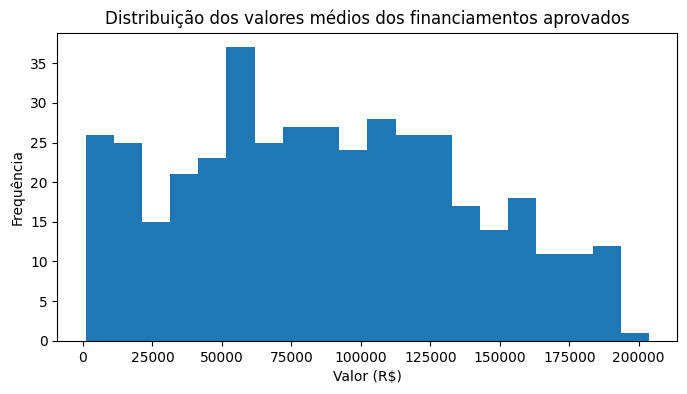

In [224]:
#Financiamentos aprovados

financiamento_aprovado = propostas_credito[propostas_credito['status_proposta']=='Aprovada']

media_financ_aprov_por_cliente = financiamento_aprovado.groupby('cod_cliente')['valor_proposta'].mean()

plt.figure(figsize=[8,4])
media_financ_aprov_por_cliente.plot(kind='hist', bins=20)
plt.title('Distribuição dos valores médios dos financiamentos aprovados')
plt.ylabel('Frequência')
plt.xlabel('Valor (R$)')

Text(0.5, 0, 'Valor (R$)')

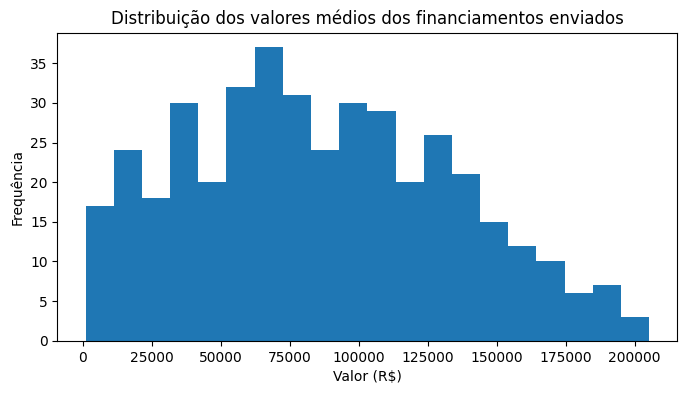

In [225]:
#Financiamentos enviados

financiamento_enviado = propostas_credito[propostas_credito['status_proposta']=='Enviada']

media_financ_enviada_por_cliente = financiamento_enviado.groupby('cod_cliente')['valor_proposta'].mean()

plt.figure(figsize=[8,4])
media_financ_enviada_por_cliente.plot(kind='hist', bins=20)
plt.title('Distribuição dos valores médios dos financiamentos enviados')
plt.ylabel('Frequência')
plt.xlabel('Valor (R$)')

Text(0.5, 0, 'Valor (R$)')

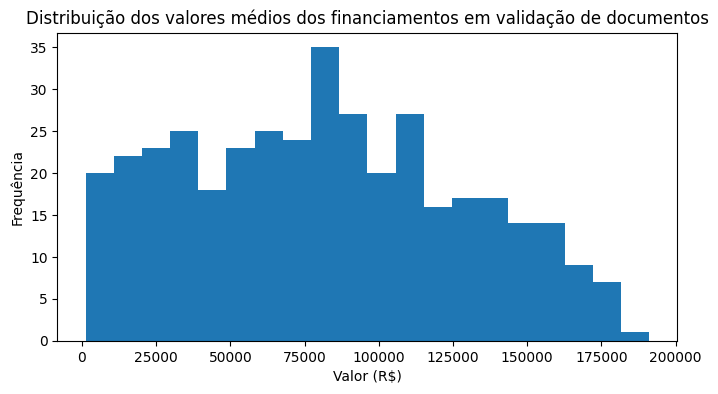

In [226]:
#Financiamentos validação documantos 

financiamento_valid_doc = propostas_credito[propostas_credito['status_proposta']=='Validação documentos']

media_financ_valid_doc_por_cliente = financiamento_valid_doc.groupby('cod_cliente')['valor_proposta'].mean()

plt.figure(figsize=[8,4])
media_financ_valid_doc_por_cliente.plot(kind='hist', bins=20)
plt.title('Distribuição dos valores médios dos financiamentos em validação de documentos')
plt.ylabel('Frequência')
plt.xlabel('Valor (R$)')

Conclusão
- Os valores de pedidos de financiamento possuem uma distribuição semelhante entre os status dos financiamentos, sendo que a grande maioria não ultrapassa R$150.000,00

### 4.3 Agencia digital versus agência física

#### 4.3.1 Trabalhar os dados filtrados para o ano de 2022

In [227]:
#filtrar os dados para agencias digitais (cod_agencia = 7) e agencias físicas (cod_agencia != 7), para o ano de 2022

agencia_digital_2022 = transacoes_e_contas[(transacoes_e_contas['cod_agencia']==7) & (transacoes_e_contas['ano_transacao']==2022)]
agencia_fisica_2022 = transacoes_e_contas[(transacoes_e_contas['cod_agencia']!=7)&(transacoes_e_contas['ano_transacao']==2022)]

Text(0, 0.5, '')

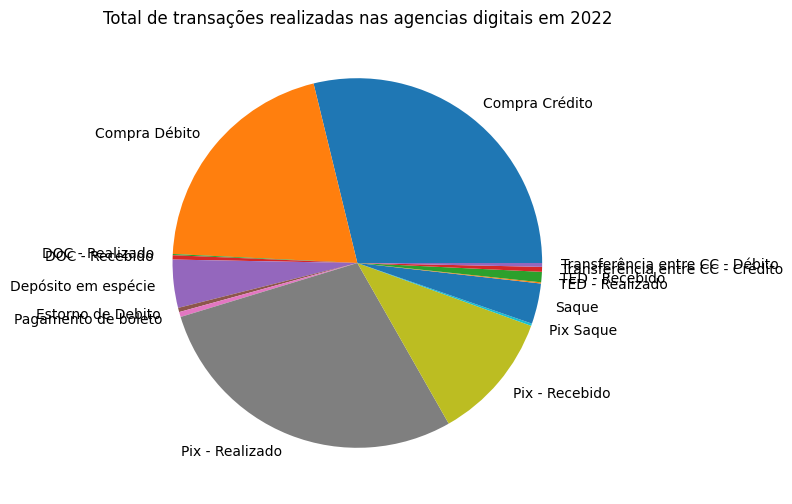

In [228]:
#Qual o total de transações financeiras em agencias digitais?
transacoes_agencia_digital = agencia_digital_2022.groupby('nome_transacao')['cod_agencia'].count()

#descobrindo a porcentagem de representação de cada uma das transações
transacoes_por_agencia_digital_total = transacoes_agencia_digital.sum()

transacoes_por_agencia_digital_porcent = (transacoes_agencia_digital/transacoes_por_agencia_digital_total)*100

plt.figure(figsize=[10,6])
transacoes_por_agencia_digital_porcent.plot(kind='pie')
plt.title('Total de transações realizadas nas agencias digitais em 2022')
plt.ylabel('')

Text(0, 0.5, '')

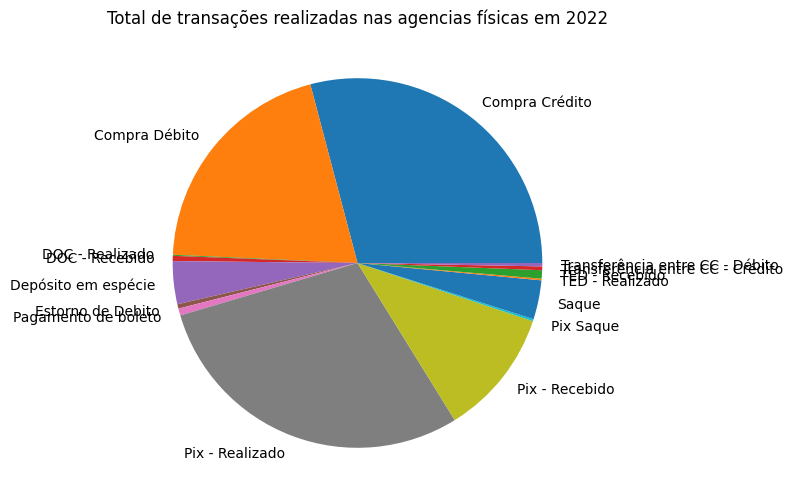

In [229]:
#Qual o total de transações financeiras em agencias físicas?
transacoes_agencia_fisica = agencia_fisica_2022.groupby('nome_transacao')['cod_agencia'].count()

#descobrindo a porcentagem de representação de cada uma das transações
transacoes_por_agencia_fisica_total = transacoes_agencia_fisica.sum()

transacoes_por_agencia_fisica_porcent = (transacoes_agencia_fisica/transacoes_por_agencia_fisica_total)*100

plt.figure(figsize=[10,6])
transacoes_por_agencia_fisica_porcent.plot(kind='pie')
plt.title('Total de transações realizadas nas agencias físicas em 2022')
plt.ylabel('')

In [230]:
print("Principais transações realizadas em 2022 em agência digital")
print(transacoes_por_agencia_digital_porcent.sort_values(ascending=False).head())

print()
print('Principais transações realizadas em 2022 em agência física')
print(transacoes_por_agencia_fisica_porcent.sort_values(ascending=False).head())

Principais transações realizadas em 2022 em agência digital
nome_transacao
Compra Crédito         28.809700
Pix - Realizado        28.513184
Compra Débito          20.411945
Pix - Recebido         11.246426
Depósito em espécie     4.204172
Name: cod_agencia, dtype: float64

Principais transações realizadas em 2022 em agência física
nome_transacao
Pix - Realizado        29.239501
Compra Crédito         29.108967
Compra Débito          20.181612
Pix - Recebido         11.083995
Depósito em espécie     3.751419
Name: cod_agencia, dtype: float64


Conclusão
- Quando consideramos as principais transações realizadas em agência fisica ou digital temos comportamentos semelhantes entre as transações realizadas pelos clientes.
- No ano de 2022 na agência digital a principal transação realizada é a compra no crédito, enquanto na agência física a principal transação realizada foi a realização de Pix.

#### 4.3.2 Analise estatistica comparando se tem diferenças nas transações entre usuários digitais e físicos

### 4.4 Coorte - Padrões de inatividade

Preciso separar algumas informações referentes a data da primeira transação, integrar isso no dataframe para realizar a analise de coortes. 

In [231]:
print(contas.columns)
print()
print(propostas_credito.columns)
print()
print(transacoes.columns)

Index(['num_conta', 'cod_cliente', 'cod_agencia', 'cod_colaborador',
       'tipo_conta', 'data_abertura', 'saldo_total', 'saldo_disponivel',
       'data_ultimo_lancamento'],
      dtype='object')

Index(['cod_proposta', 'cod_cliente', 'cod_colaborador',
       'data_entrada_proposta', 'taxa_juros_mensal', 'valor_proposta',
       'valor_financiamento', 'valor_entrada', 'valor_prestacao',
       'quantidade_parcelas', 'carencia', 'status_proposta', 'ano'],
      dtype='object')

Index(['cod_transacao', 'num_conta', 'data_transacao', 'nome_transacao',
       'valor_transacao', 'data', 'ano_transacao', 'month', 'day',
       'day_of_week'],
      dtype='object')


In [232]:
#unir os dataframes 'contas', 'propostas_credito' e 'transacoes' para conseguir extrair as datas iniciais de cada um dos DataFrames

merged_corte = contas.merge(transacoes, on='num_conta')
merged_coorte = merged_corte.merge(propostas_credito, on='cod_cliente')

In [233]:
merged_coorte = merged_coorte.drop('cod_colaborador_y', axis='columns')
merged_coorte.rename(
    columns={'cod_colaborador_x':'cod_colaborador'},inplace=True,
)

In [234]:
merged_coorte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143694 entries, 0 to 143693
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   num_conta               143694 non-null  int64              
 1   cod_cliente             143694 non-null  int64              
 2   cod_agencia             143694 non-null  int64              
 3   cod_colaborador         143694 non-null  int64              
 4   tipo_conta              143694 non-null  object             
 5   data_abertura           143694 non-null  datetime64[ns, UTC]
 6   saldo_total             143694 non-null  float64            
 7   saldo_disponivel        143694 non-null  float64            
 8   data_ultimo_lancamento  143694 non-null  datetime64[ns, UTC]
 9   cod_transacao           143694 non-null  int64              
 10  data_transacao          143694 non-null  datetime64[ns, UTC]
 11  nome_transacao          14

In [235]:
#Alterar o formato da coluna data_transacao

merged_coorte['data_transacao'] = merged_coorte['data_transacao'].dt.tz_convert(None)

In [236]:
#criar coluna só com a data (data_dma) de transacao

merged_coorte['data_dma'] = merged_coorte['data_transacao'].dt.date

In [237]:
#converter nova coluna para o formato datetime
merged_coorte['data_dma'] = pd.to_datetime(merged_coorte['data_dma'])

#### 4.4.1 Trabalhar com as transações

Separar os dados para aparecer o mês e o ano na coorte.

In [238]:
#transformar o tipo de dados de 'data_dma'
merged_coorte['data_dma'] = merged_coorte['data_dma'].dt.tz_localize(None)

#obter a primeira data de transação
first_transaction_dates = merged_coorte.groupby('cod_cliente')['data_dma'].min()

#renomear a coluna
first_transaction_dates.name = 'first_transaction_datetime'

#anexar os dados
transaction_date = merged_coorte.join(first_transaction_dates, on='cod_cliente')

transaction_date['transaction_month_year'] = transaction_date['data_dma'].dt.to_period('M')

transaction_date['first_transaction_month_year'] = transaction_date['first_transaction_datetime'].dt.to_period('M')

# Agrupar por coortes
cohort_stats = transaction_date.groupby('first_transaction_month_year')['valor_transacao'].sum()
print(cohort_stats.head(10)) 

first_transaction_month_year
2010-02     13870.52
2010-03     26814.96
2010-08     34261.64
2010-09    215555.28
2010-11     32308.74
2010-12     53798.61
2011-02    263565.13
2011-03    330307.34
2011-04    117446.82
2011-05    162197.11
Freq: M, Name: valor_transacao, dtype: float64


In [239]:
print(cohort_stats.tail(10))

first_transaction_month_year
2022-04     338317.45
2022-05     102973.30
2022-06     425829.03
2022-07     386249.74
2022-08     609368.91
2022-09     264966.19
2022-10     632625.02
2022-11    1133528.40
2022-12     316437.15
2023-01     198606.77
Freq: M, Name: valor_transacao, dtype: float64


In [240]:
transaction_date.pivot_table(
    index='first_transaction_month_year',
    columns='transaction_month_year',
    values='cod_cliente',
    aggfunc='sum',
    fill_value=''
) 

transaction_month_year,2010-02,2010-03,2010-06,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,...,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01
first_transaction_month_year,,,,,,,,,,,,,,,,,,,,,
2010-02,1528,4584,2292,,,,,,,,...,,,,,,,,,,
2010-03,,24,24,,120,84,,,60,,...,,,,,,,,,,
2010-08,,,,17496,7776,17496,,,,,...,3888,11664,,,,,,,,
2010-09,,,,,636,,,,,,...,,,,,,,,,,
2010-11,,,,,,,510,1785,,,...,,,,,,,,,765,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09,,,,,,,,,,,...,,,,,,15243,16828,35686,291411,
2022-10,,,,,,,,,,,...,,,,,,,56977,39369,964959,
2022-11,,,,,,,,,,,...,,,,,,,,63724,1160647,


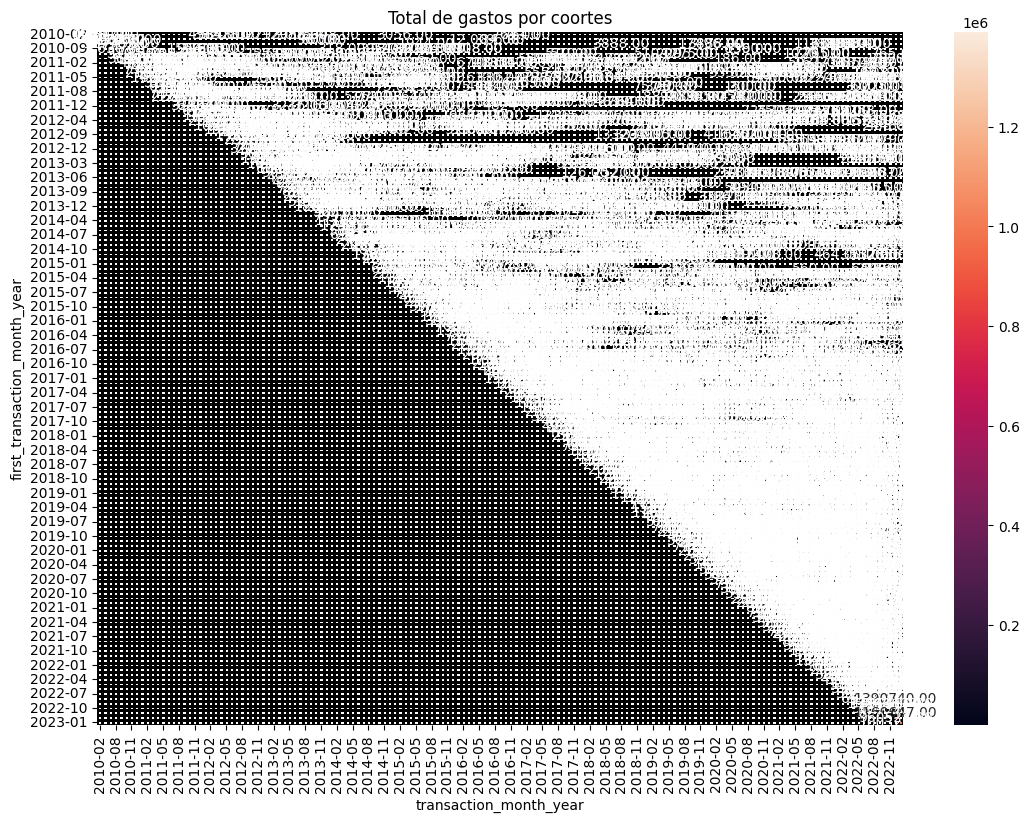

In [275]:
#plotar o gráfico de soma de gastos da coorte

plt.figure(figsize=(13,9))
plt.title('Total de gastos por coortes')
sns.heatmap(transaction_date.pivot_table(
    index='first_transaction_month_year',
    columns='transaction_month_year',
    values='cod_cliente',
    aggfunc='sum'),
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',)
plt.show()

Conclusão
- A divisão das coortes nos mostra que clientes antigos, nas coortes iniciais em 2010 por exemplo, não movimentaram tanto em transações como clientes mais recentes nas coortes de 2022.

- Conforme a figura, os valores movimentados ao longo do tempo por cliente chegoi a cerca de R$ 1,4 milhões.

- A alternativa para melhor ver caso a caso seria filtrar os dados por ano.

### 4.4.2 Tempo de vida da coorte

In [274]:
#agrupar os dados das coortes
transaction_grouped_by_cohort = transaction_date.groupby(['first_transaction_month_year','transaction_month_year']
                                                         ).agg({'cod_transacao':'nunique','cod_cliente':'nunique'})

#criar coluna de transação por cliente
transaction_grouped_by_cohort['transacao_por_cliente'] = (
    transaction_grouped_by_cohort['cod_transacao']/transaction_grouped_by_cohort['cod_cliente'])

transaction_grouped_by_cohort = transaction_grouped_by_cohort.reset_index()

#criar a coluna de tempo de vida da coorte

transaction_grouped_by_cohort['tempo_vida_coorte'] = (
    ((transaction_grouped_by_cohort['transaction_month_year'].astype('datetime64[M]') 
     - transaction_grouped_by_cohort['first_transaction_month_year'].astype('datetime64[M]')).dt.days)
    / 30
).astype('int')


#transaction_grouped_by_cohort['tempo_vida_coorte'] = transaction_grouped_by_cohort['tempo_vida_coorte'].dt.to_period('M')

#arredondar o resultado
transaction_grouped_by_cohort['tempo_vida_coorte'] = (transaction_grouped_by_cohort['tempo_vida_coorte'].round().astype('int'))

transaction_grouped_by_cohort.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='transacao_por_cliente',
    aggfunc='sum',
    fill_value='',
    head(20)) 


SyntaxError: positional argument follows keyword argument (1886002457.py, line 31)

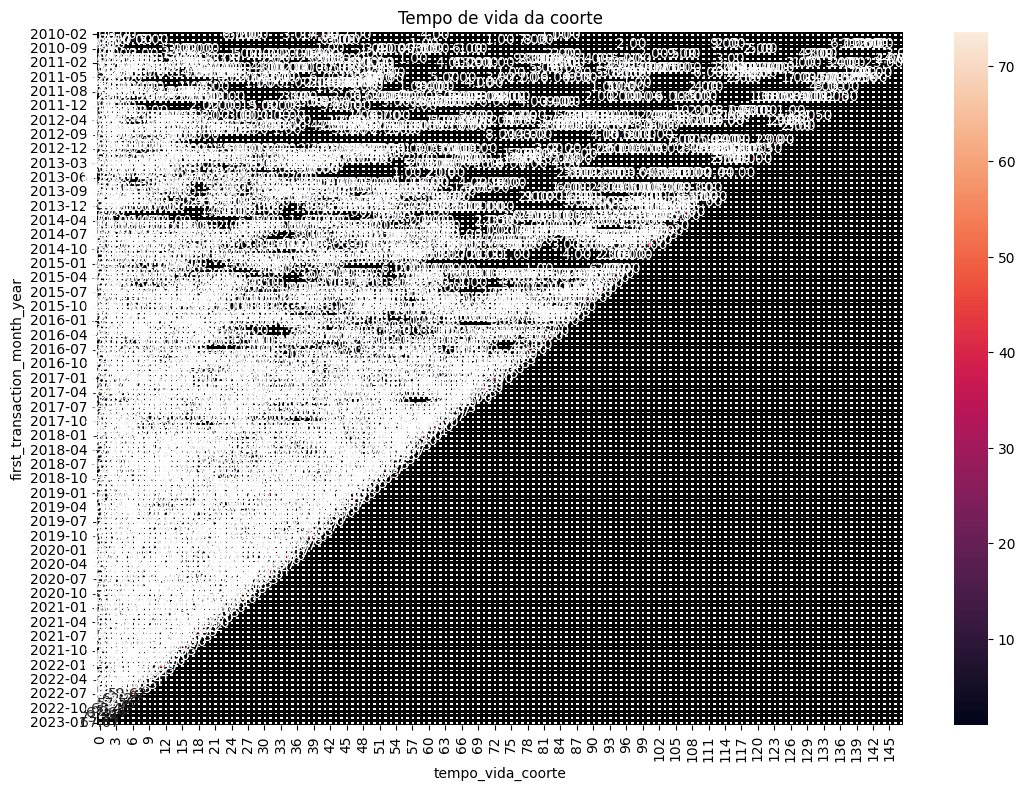

In [256]:
#converter o tipo de dados para numérico

transaction_grouped_by_cohort['tempo_vida_coorte'] = transaction_grouped_by_cohort['tempo_vida_coorte'].astype(int)
#fazer um mapa de calor do tempo de vida da coorte

plt.figure(figsize=(13,9))
plt.title('Tempo de vida da coorte')
sns.heatmap(transaction_grouped_by_cohort.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='transacao_por_cliente',
    aggfunc='sum'),
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',)
plt.show()


Conclusão
- Pensando no tempo de vida de cada coorte, a quantidade de transações por cliente é alta no mês zero e apresenta pouca evolução para os meses seguintes em muitos casos. 

- Conforme o gráfico, podemos observar que alguns clientes chegaram a fazer cerca de 70 transações desde sua primeira transação.

- Muita informação no mapa de calor, será necessário separar os dados por ano para melhor visualizar o comportamento do tempode vida da coorte.

#### 4.4.2.1 - Filtrar os dados por ano para melhor visualização da informação - Trabalhar com os últimos 5 anos

In [251]:
#criar primeiro a coluna de ano da primeira transação
transaction_grouped_by_cohort['first_year_transaction'] = transaction_grouped_by_cohort['first_transaction_month_year'].dt.year

#### 4.4.2.1 - 2018

In [264]:
#Filtrar os dados para 2010

transaction_grouped_by_cohort_2010 = transaction_grouped_by_cohort[transaction_grouped_by_cohort['first_year_transaction'] ==2010]

#apresentar os resultados em uma tabela
transaction_grouped_by_cohort_2010.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='transacao_por_cliente',
    aggfunc='sum',
    fill_value='')



tempo_vida_coorte,0,1,2,3,4,5,6,7,8,9,...,133,137,139,140,141,142,143,145,146,147
first_transaction_month_year,,,,,,,,,,,,,,,,,,,,,
2010-02,8.0,,,,3.0,,,,,,...,,,,,,,,,,
2010-03,2.0,,,2.0,,,10.0,7.0,,,...,,,,,,,,,,
2010-08,9.0,4.0,9.0,,,,,,,,...,,6.0,2.0,11.0,2.0,2.0,6.0,,,
2010-09,2.0,,,,,,,,,,...,,,,,,,,,,
2010-11,2.0,7.0,,,1.0,,,,3.0,,...,3.0,,,,,,,,,3.0
2010-12,5.0,5.333333,1.5,7.0,,2.0,2.0,5.0,4.0,1.0,...,,,,,,,,4.0,24.0,


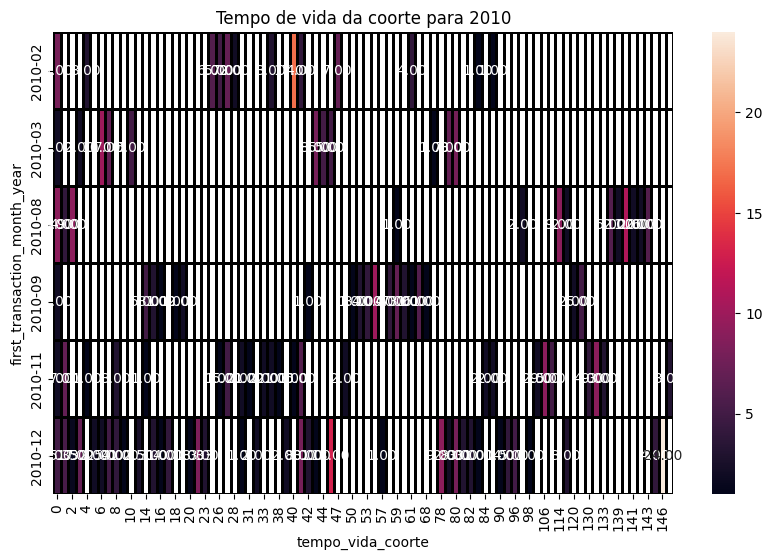

In [265]:
#Montar o mapa de calor para 2010
plt.figure(figsize=[10,6])
plt.title('Tempo de vida da coorte para 2010')
sns.heatmap(transaction_grouped_by_cohort_2010.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='transacao_por_cliente',
    aggfunc='sum'),
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',)
plt.show()

#### 4.4.2.1 - 2011

In [266]:
#Filtrar os dados para 2011

transaction_grouped_by_cohort_2011 = transaction_grouped_by_cohort[transaction_grouped_by_cohort['first_year_transaction'] ==2011]

#apresentar os resultados em uma tabela
transaction_grouped_by_cohort_2011.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='transacao_por_cliente',
    aggfunc='sum',
    fill_value='')

tempo_vida_coorte,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,144
first_transaction_month_year,,,,,,,,,,,,,,,,,,,,,
2011-02,3.500000,,1.0,,,,1.0,3.0,3.0,,...,,,3.0,2.0,4.0,,,,,23.0
2011-03,3.000000,,3.5,11.5,6.0,1.0,2.0,,13.0,6.0,...,,,,,,,,,,
2011-04,4.333333,5.0,,4.0,2.0,4.0,6.0,,,8.0,...,,,,,,1.0,7.0,,29.0,
2011-05,3.250000,4.5,,7.0,,6.0,,,,,...,4.0,5.0,,7.5,,3.0,2.5,28.0,,
2011-06,2.000000,6.0,4.0,,,,,,,,...,,,,,,,,,,
2011-07,5.500000,8.5,3.0,11.0,2.0,,,2.0,1.0,4.0,...,8.0,,,3.0,,,,,,
2011-08,2.000000,,7.0,3.0,4.0,4.0,5.0,5.0,,,...,,,,,,,,,,
2011-09,4.200000,2.0,2.5,4.0,,,,2.5,11.0,9.0,...,,1.0,32.5,,,,,,,
2011-11,1.000000,,,,,,,,,,...,,,,,,,,,,


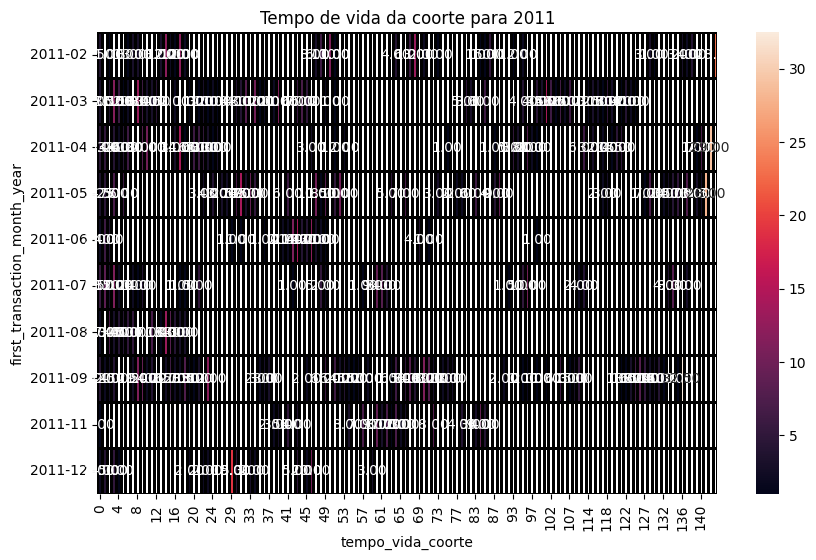

In [267]:
#Montar o mapa de calor para 2011
plt.figure(figsize=[10,6])
plt.title('Tempo de vida da coorte para 2011')
sns.heatmap(transaction_grouped_by_cohort_2011.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='transacao_por_cliente',
    aggfunc='sum'),
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',)
plt.show()

#### 4.4.2 - Trabalhar as coortes filtradas a cada dois anos 

#### 4.4.2.1 2010 e 2011

In [ ]:
print(merged_coorte['ano_transacao'].sample(10))

50243     2022
67688     2018
55942     2022
92972     2022
114951    2022
74068     2022
11378     2022
34986     2019
100799    2022
107336    2021
Name: ano_transacao, dtype: int32


In [ ]:
#filtrar os dados para utilizar o ano de 2010 e 2011
merged_coorte_10_11 = merged_coorte[(merged_coorte['ano_transacao'] == 2010) | (merged_coorte['ano_transacao']==2011)]

In [ ]:
#obter a primeira data de transação
first_transaction_dates = merged_coorte_10_11.groupby('cod_cliente')['data_dma'].min()

#renomear a coluna
first_transaction_dates.name = 'first_transaction_datetime'

#anexar os dados
transaction_date_10_11 = merged_coorte.join(first_transaction_dates, on='cod_cliente')

transaction_date_10_11['transaction_month_year'] = transaction_date_10_11['data_dma'].dt.to_period('M')

transaction_date_10_11['first_transaction_month_year'] = transaction_date_10_11['first_transaction_datetime'].dt.to_period('M')

# Agrupar por coortes
cohort_stats = transaction_date_10_11.groupby('first_transaction_month_year')['valor_transacao'].sum()
print(cohort_stats.head(10)) 

first_transaction_month_year
2010-02     13870.52
2010-03     26814.96
2010-08     34261.64
2010-09    215555.28
2010-11     32308.74
2010-12     53798.61
2011-02    263565.13
2011-03    330307.34
2011-04    117446.82
2011-05    162197.11
Freq: M, Name: valor_transacao, dtype: float64


In [ ]:
transaction_date_10_11.pivot_table(
    index='first_transaction_month_year',
    columns='transaction_month_year',
    values='cod_cliente',
    aggfunc='sum',
    fill_value=''
) 

transaction_month_year,2010-02,2010-03,2010-06,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
first_transaction_month_year,,,,,,,,,,,,,,,,,,,,,
2010-02,1528,4584,2292,,,,,,,,...,,,,,,,,,,
2010-03,,24,24,,120,84,,,60,,...,,,,,,,,,,
2010-08,,,,17496,7776,17496,,,,,...,3888,3888,11664,,,,,,,
2010-09,,,,,636,,,,,,...,,,,,,,,,,
2010-11,,,,,,,510,1785,,,...,,,,,,,,,,765
2010-12,,,,,,,,3659,5341,697,...,,,,,,,,,132,792
2011-02,,,,,,,,,,4453,...,,,5031,3354,6708,,,,,38571
2011-03,,,,,,,,,,,...,,,,,,,,,,
2011-04,,,,,,,,,,,...,,,,,,,2097,14679,,60813
